# Scoring metrics comparison

In [10]:
import autopandas as apd
import numpy as np
%reload_ext autoreload
%autoreload 2

from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, brier_score_loss, f1_score, log_loss, precision_score, recall_score, jaccard_score, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [11]:
!ls autopandas/data

adult.csv	  diabetes.csv	 seeds.csv     titanic_test.csv
boston_test.csv   iris.csv	 squares1.csv  titanic_train.csv
boston_train.csv  mushrooms.csv  squares2.csv  wine.csv


In [28]:
# WINE
#data = apd.read_csv('autopandas/data/wine.csv')
#data.set_class('quality')

# ADULT
data = apd.read_csv('autopandas/data/adult.csv')
data = data.encoding('label', 'categorical')
data.set_class('income')

In [32]:
data.descriptors()

,task,shape,ratio,sparsity,class_deviation,categorical_ratio,missing_ratio,max_skewness,mean_skewness,min_skewness
0,classification,"(48842, 15)",0.000307,0.245816,0.426649,0.933333,0.0,5.20872,0.280581,-3.689529


In [31]:
data('header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,226802,1,6,4,7,3,2,1,0,0,39,39,0
1,21,4,89814,11,8,2,5,0,4,1,0,0,49,39,0
2,11,2,336951,7,11,2,11,0,4,1,0,0,39,39,1
3,27,4,160323,15,9,2,7,0,2,1,98,0,39,39,1
4,1,0,103497,15,9,4,0,3,4,0,0,0,29,39,0


In [33]:
metrics = [accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss, roc_auc_score]
# average_precision_score, brier_score_loss, 
classifiers = [RandomForestClassifier(), MLPClassifier(hidden_layer_sizes=(10,)), LinearSVC(), GaussianNB(), DecisionTreeClassifier()]
# LinearRegression()

In [34]:
def model_name(clf):
    return str(clf).split('(')[0]

def metric_name(mtr):
    return str(mtr).split(' ')[1]

def columns_to_rank(df):
    new_df = df.copy()
    for column in columns:
        new_df[column] = apd.generators.copula.vector_to_rank(df[column], reverse=True)
    return new_df

In [35]:
columns = list(map(metric_name, metrics)) 
index = list(map(model_name, classifiers))
values = np.zeros((len(classifiers), len(metrics)))
for i, clf in enumerate(classifiers):
    for j, mtr in enumerate(metrics):
        try:
            score = data.score_error_bars(n=5, metric=mtr, model=clf)[0]
        except:
            # TODO: print exception?
            score = -1
        values[i][j] = score
results = apd.AutoData(values, columns=columns, index=index)
results_rank = columns_to_rank(results)

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarni

In [36]:
results

,accuracy_score,balanced_accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss,roc_auc_score
RandomForestClassifier,0.853695,0.771513,0.849702,0.848455,0.854009,0.750642,0.361780,0.771704
MLPClassifier,0.737282,0.660272,0.632336,0.780947,0.727892,0.486852,5.831671,0.636099
LinearSVC,0.676503,0.536771,0.696457,0.761615,0.681908,0.580194,15.749085,0.539209
GaussianNB,0.791374,0.623272,0.761274,0.770082,0.791374,0.650178,0.884329,0.623272
DecisionTreeClassifier,0.811315,0.747723,0.812163,0.813203,0.810660,0.697297,6.536322,0.746262


In [37]:
results_rank

,accuracy_score,balanced_accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss,roc_auc_score
RandomForestClassifier,1,1,1,1,1,1,5,1
MLPClassifier,4,3,5,3,4,5,3,3
LinearSVC,5,5,4,5,5,4,1,5
GaussianNB,3,4,3,4,3,3,4,4
DecisionTreeClassifier,2,2,2,2,2,2,2,2


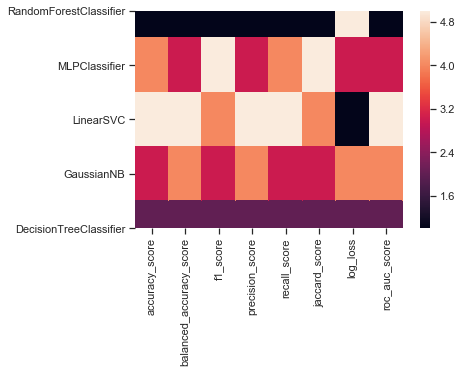

In [38]:
results_rank.plot()

In [39]:
results_rank.drop('log_loss', axis=1)
results_rank.mean(axis=1)

RandomForestClassifier    1.50
MLPClassifier             3.75
LinearSVC                 4.25
GaussianNB                3.50
DecisionTreeClassifier    2.00
dtype: float64